In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import json
results = json.load(open("temp/results.json", "r"))

In [33]:
import numpy as np

configs = {'steps':set(), 'grid':set()}

frameworks = set()
threads = set()

for r in results:
    r['steps'] = r['settings']['frames'] * r['settings']['save_every']
    configs['steps'].add(r['steps'])
    r['grid'] = tuple(r['settings']['grid']['n'])
    configs['grid'].add(r['grid'])
    frameworks.add(r['framework'])
    threads.add(r['threads'])
    
configs = {k:sorted(list(v)) for k, v in configs.items()}
threads = sorted(list(threads))

test_list = []
for idx in np.ndindex(*[len(v) for v in configs.values()]):    
    test_list.append({k:v[i] for (k, v), i in zip(configs.items(), idx)})

{'steps': 1, 'grid': (10, 316, 316)}


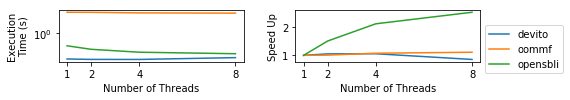

{'steps': 1, 'grid': (100, 100, 100)}


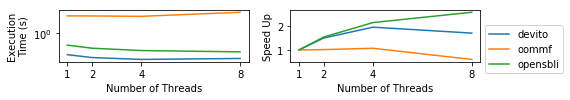

{'steps': 1, 'grid': (316, 10, 316)}


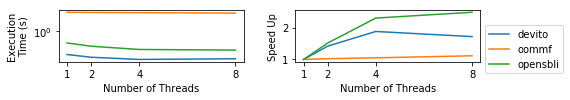

{'steps': 1, 'grid': (316, 316, 10)}


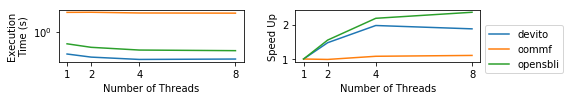

{'steps': 100, 'grid': (10, 316, 316)}


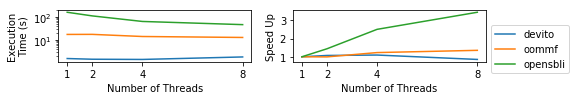

{'steps': 100, 'grid': (100, 100, 100)}


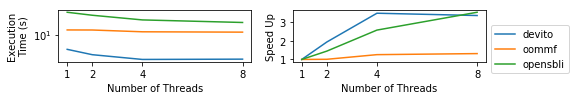

{'steps': 100, 'grid': (316, 10, 316)}


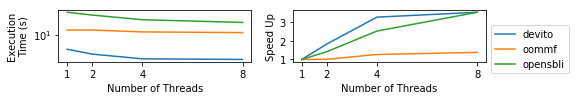

{'steps': 100, 'grid': (316, 316, 10)}


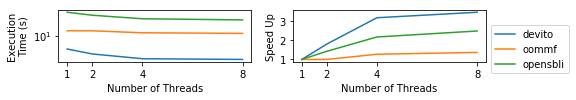

{'steps': 1000, 'grid': (10, 316, 316)}


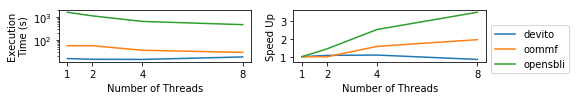

{'steps': 1000, 'grid': (100, 100, 100)}


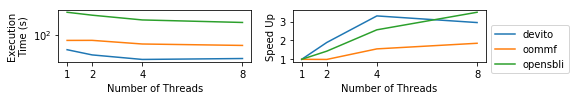

{'steps': 1000, 'grid': (316, 10, 316)}


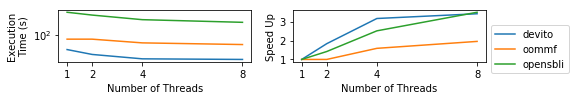

{'steps': 1000, 'grid': (316, 316, 10)}


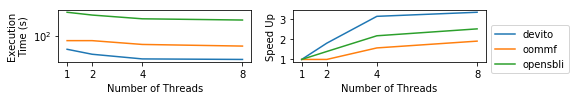

In [34]:
import matplotlib.pyplot as plt

for test in test_list:
    print(test)
    fig, ax = plt.subplots(1, 2, figsize=(7,1.5))
    for framework in frameworks:
        r_sub = [r for r in results if r['framework'] == framework
                         and r['steps'] == test['steps']
                         and r['grid'] == test['grid']]

        if len(r_sub) > 0:    
            times = {n:[] for n in threads}
            for r in r_sub:
                times[r['threads']].append(r['run_time'])

            n, t = zip(*sorted({k:np.average(v) for k, v in times.items() if len(v) > 0}.items()))
            p = ax[1].plot(n, t[0] / np.array(t), label=framework)
            p = ax[0].semilogy(n, t, label=framework)
            
    ax[1].set(xlabel=r"Number of Threads", ylabel=r"Speed Up")
    ax[1].get_xaxis().set_ticks(threads)
    ax[0].set(xlabel=r"Number of Threads", ylabel=r"Execution" "\n" "Time (s)")
    ax[0].get_xaxis().set_ticks(threads)
    ax[1].legend(bbox_to_anchor=(1, 0.8))
    fig.tight_layout()

    plt.show()
        
    